In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## KLASYFIKACJA atrybutu Condition

In [11]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

df =pd.read_csv("ebay_iphone.csv")
df.drop(columns="Name",inplace=True)

### Sprawdzenie korelacji

<Axes: >

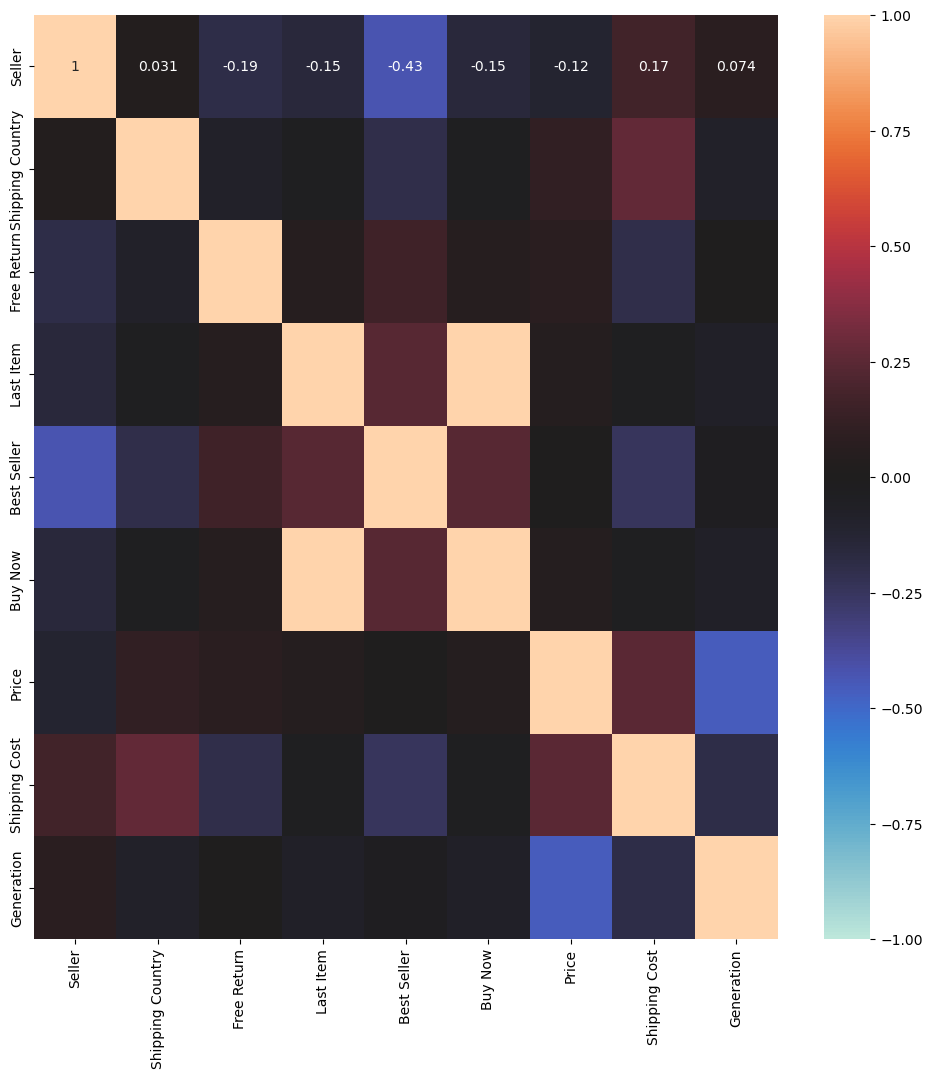

In [12]:
enc = OrdinalEncoder()
df[["Seller","Shipping Country","Free Return","Last Item","Best Seller","Buy Now","Generation"]]=enc.fit_transform(df[["Seller","Shipping Country","Free Return","Last Item","Best Seller","Buy Now","Generation"]])
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[["Seller","Shipping Country","Free Return","Last Item","Best Seller","Buy Now","Price","Shipping Cost","Generation"]].corr(), annot=True, center=0.0,ax=ax,vmax=1,vmin=-1)

### Usuwanie wysoko skorelowanego atrybutu

In [13]:
df.drop(columns="Buy Now",inplace=True)

In [14]:
X = df.drop(columns="Condition")
y = df["Condition"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

### Algorytm: Regresja logistyczna

In [15]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_valid,y_valid))

0.6756756756756757


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Algorytm: KNN

In [16]:
knn  = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(lr.score(X_valid,y_valid))

0.6756756756756757


### Drzewo decyzyjne

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_valid,y_valid))

0.6351351351351351


### Las losowy

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_valid,y_valid))

0.7297297297297297


Najlepszy wynik dał las losowy 

In [20]:
print(classification_report(y_test,rf.predict(X_test)))
print(rf.score(X_test,y_test))

                  precision    recall  f1-score   support

Fabrycznie nowy        0.50      0.14      0.22        14
    Nowy (inny)        0.62      0.56      0.59         9
      Odnowiony        0.40      0.50      0.44        12
Tylko na części        0.73      0.40      0.52        20
        Używany        0.80      0.91      0.85       130

        accuracy                           0.75       185
       macro avg       0.61      0.50      0.52       185
    weighted avg       0.74      0.75      0.73       185

0.7513513513513513


In [21]:
import joblib 

In [22]:
joblib.dump(rf, 'condition_classifier.pkl')

['condition_classifier.pkl']